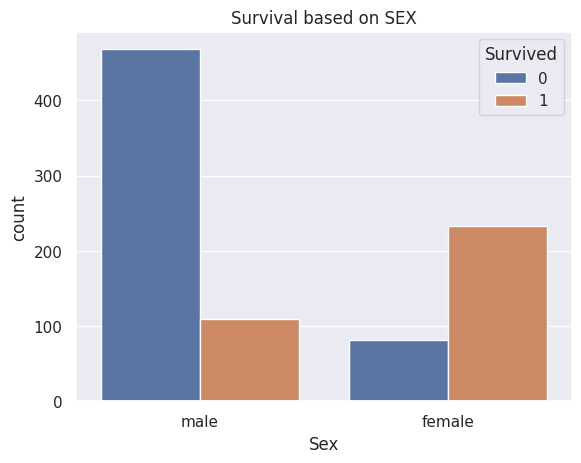

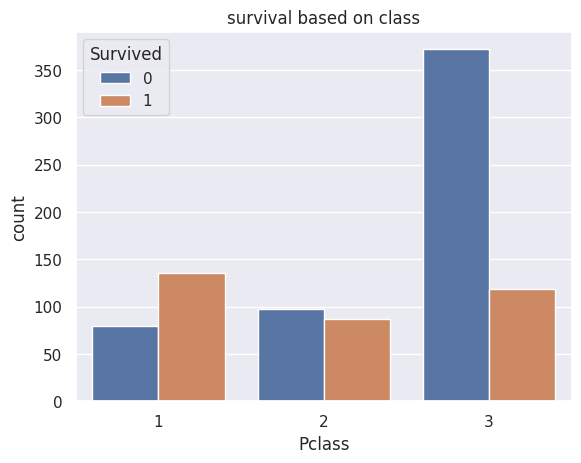

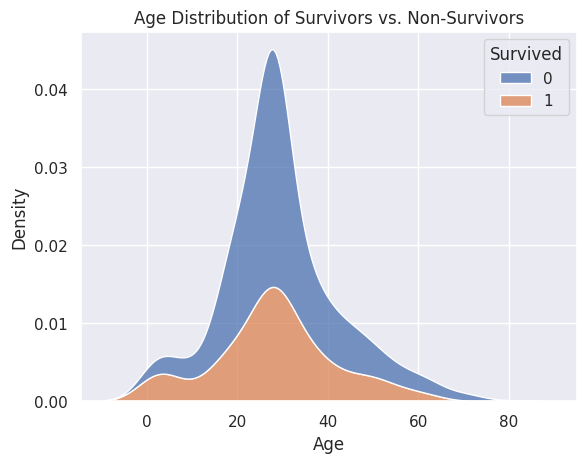

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  FamilySize  Embarked_C  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500           2       False       False        True  
1          PC 17599  71.2833           2        True       False       False  
2  STON/O2. 3101282   7.9250           1       False       

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
titanic_df=pd.read_csv('/train.csv')
titanic_df.head()

titanic_df.describe()

median_age=titanic_df['Age'].median()
titanic_df['Age']=titanic_df['Age'].fillna(median_age)

titanic_df.drop(columns=['Cabin'],inplace=True)

mode_embarked=titanic_df['Embarked'].mode()[0]
titanic_df['Embarked']=titanic_df['Embarked'].fillna(mode_embarked)

titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

sns.set(style="darkgrid")
sns.countplot(x='Sex', hue='Survived',data=titanic_df)
plt.title('Survival based on SEX')
plt.show()

sns.countplot(x='Pclass', hue='Survived',data=titanic_df)
plt.title('survival based on class')
plt.show()

sns.kdeplot(data=titanic_df, x='Age', hue='Survived', multiple="stack")
plt.title('Age Distribution of Survivors vs. Non-Survivors')
plt.show()

titanic_df['Sex']=titanic_df['Sex'].map({'female':1 , 'male':0})
titanic_df=pd.get_dummies(titanic_df,columns=['Embarked'])
print(titanic_df.head())

feature_cols = ['Pclass', 'Sex', 'Age', 'FamilySize', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X=titanic_df[feature_cols]
y=titanic_df['Survived']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)
print("Model training complete")
y_pred=model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")



